# Modelos TFG 

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots



In [20]:
df_modelos = pd.read_csv("data/datosFinales/df_dalex.csv", sep = ";")
# drop columns from df_modelos which end with _1
df_modelos = df_modelos.loc[:, ~df_modelos.columns.str.endswith('diferencia_1')]
categoricas = pd.read_csv("data/categoricas.csv", sep = ",").squeeze().tolist()
print(len(categoricas))
#pop from categoricas 'tipo_plastia' and 'via_asc_plastia'
categoricas.remove('tipo_plastia')
categoricas.remove('via_asc_plastia')
print(len(categoricas))

30
28


In [21]:
df_modelos.shape

(728, 64)

In [22]:
#fija el random state de todo el documento para todas las ejecuciones
np.random.seed(14)

In [23]:
df_modelos = df_modelos.loc[:, ~df_modelos.columns.str.endswith('_5')]
df_modelos = df_modelos.loc[:, ~df_modelos.columns.str.endswith('_4')]
df_modelos = df_modelos.loc[:, ~df_modelos.columns.str.endswith('_3')]
#df_modelos = df_modelos.loc[:, ~df_modelos.columns.str.endswith('_2')]

df_modelos

,cn,peso,imc,hemoglobina,asa,talla,perdida_sang,cardiopatia,localizacion,id_registro,...,albumina_2,frec_resp_2,creatinina_2,quick_2,temp_corp_2,il6_2,proteinas_2,linfocitos_2,pcr_2,fuga
0,0.0,79.0,24.9,14.0,1.0,178.0,100.0,0.0,4.0,92-1,...,4.0,24.0,0.72,NaN,36.6,3.00,4.70,NaN,207.00,0
1,0.0,95.0,32.9,12.1,1.0,170.0,150.0,0.0,4.0,92-2,...,2.8,23.0,1.24,NaN,36.4,55.69,4.30,NaN,141.70,0
2,1.0,94.0,30.7,12.3,2.0,175.0,150.0,1.0,4.0,92-3,...,3.8,22.0,0.71,NaN,35.5,75.62,5.60,7.074117,126.40,0
3,1.0,63.0,22.3,11.1,1.0,168.0,150.0,0.0,3.0,92-4,...,2.8,22.0,0.43,NaN,36.0,874.40,4.70,NaN,155.40,1
4,1.0,57.0,23.1,9.0,1.0,157.0,100.0,0.0,4.0,92-5,...,3.0,18.0,0.62,NaN,35.8,600.00,4.83,NaN,414.90,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,0.0,83.0,29.1,13.0,1.0,169.0,800.0,0.0,3.0,613-30,...,NaN,29.0,1.04,65.0,37.8,NaN,NaN,7.048386,7.89,1
724,1.0,58.0,22.7,12.8,1.0,160.0,800.0,0.0,5.0,613-31,...,NaN,24.0,0.52,87.0,37.2,NaN,NaN,6.381816,9.06,0
725,0.0,82.0,28.0,14.8,1.0,171.0,0.0,0.0,7.0,613-32,...,NaN,26.0,0.57,70.0,37.0,NaN,NaN,7.139660,7.89,0
726,0.0,53.0,20.7,15.0,1.0,160.0,100.0,0.0,6.0,617-1,...,NaN,15.0,0.42,32.0,37.1,NaN,NaN,NaN,272.00,1


## Modelos

In [24]:
from sklearn.svm import SVC
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (classification_report, 
                           confusion_matrix, 
                           accuracy_score,
                           roc_auc_score,
                           f1_score)
from sklearn.preprocessing import LabelEncoder





In [25]:
df_tmp = df_modelos.copy()[df_modelos['fuga'] != -1]
cats = []
label_encoder = LabelEncoder()
for col in categoricas:
    if col in df_tmp.columns:
        df_tmp[col] = label_encoder.fit_transform(df_tmp[col])
        cats.append(col)
    
columnas_a_eliminar = [col for col in df_tmp.columns if "fuga" in col]
X = df_tmp.drop(columnas_a_eliminar, axis=1)
X = X.drop(['id_registro'], axis=1)
y = df_tmp['fuga']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=14)

In [26]:
#for i,col in enumerate(X.columns):
#    print(col,i)
y.unique()

array([0, 1])

In [27]:
# modelo_hgb = HistGradientBoostingClassifier(
#     max_iter=1000,           # Número de árboles (iteraciones)
#     learning_rate=0.2,      # Tasa de aprendizaje
#     max_depth=6,            # Profundidad máxima de los árboles
#     categorical_features=categoricas,  # Especificar columnas categóricas
#     early_stopping=True,    # Parada temprana si no mejora
#     scoring='roc_auc'      # Métrica para early stopping
# )

#gridsearch l2regularization, learning_rate, class_weight (balance) 

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


param_grid = {
    'max_iter': [100],
    'learning_rate': [0.5,0.8,0.9,1],
    'max_depth': [1,2],
    'min_samples_leaf': [1,2,3,4],
    'categorical_features': [cats],
    'early_stopping': [True],
    'scoring': ['roc_auc'],
    'l2_regularization': [0.6,0.7,0.8,1],
    'class_weight': ['balanced', None]
}
modelo_hgb = HistGradientBoostingClassifier(random_state=14)
grid_search = RandomizedSearchCV(modelo_hgb, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)


RandomizedSearchCV(cv=3,
                   estimator=HistGradientBoostingClassifier(random_state=14),
                   n_jobs=-1,
                   param_distributions={'categorical_features': [['localizacion',
                                                                  'cn', 'asa',
                                                                  'cardiopatia']],
                                        'class_weight': ['balanced', None],
                                        'early_stopping': [True],
                                        'l2_regularization': [0.6, 0.7, 0.8, 1],
                                        'learning_rate': [0.5, 0.8, 0.9, 1],
                                        'max_depth': [1, 2], 'max_iter': [100],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'scoring': ['roc_auc']},
                   scoring='roc_auc')

In [28]:
#best hiperparameters
print("Mejores hiperparámetros:")
print("max_iter: 1000")
print("learning_rate: ", grid_search.best_params_['learning_rate'])
print("max_depth: ", grid_search.best_params_['max_depth'])
print("min_samples_leaf: ", grid_search.best_params_['min_samples_leaf'])
print("early_stopping: ", grid_search.best_params_['early_stopping'])
print("scoring: ", grid_search.best_params_['scoring'])
print("l2_regularization: ", grid_search.best_params_['l2_regularization'])
print("class_weight: ", grid_search.best_params_['class_weight'])
print("Mejor puntuación:")
print(grid_search.best_score_)


Mejores hiperparámetros:
max_iter: 1000
learning_rate:  0.5
max_depth:  1
min_samples_leaf:  1
early_stopping:  True
scoring:  roc_auc
l2_regularization:  1
class_weight:  balanced
Mejor puntuación:
0.6994579117630457


In [33]:
#create a model with the best hyperparameters
modelo_hgb = HistGradientBoostingClassifier(
    max_iter=100,           # Número de árboles (iteraciones)
    learning_rate=grid_search.best_params_['learning_rate'],      # Tasa de aprendizaje
    max_depth=1,            # Profundidad máxima de los árboles
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    categorical_features=cats,  # Especificar columnas categóricas
    early_stopping=True,    # Parada temprana si no mejora
    scoring='roc_auc',      # Métrica para early stopping
    l2_regularization=5,  # Regularización L2
    class_weight='balanced', # Balancear clases
    random_state=14
)

modelo_hgb.fit(X_train, y_train)

y_pred_train = modelo_hgb.predict(X_train)
y_proba_train = modelo_hgb.predict_proba(X_train)[:, 1] 

y_pred = modelo_hgb.predict(X_test)
y_proba = modelo_hgb.predict_proba(X_test)[:, 1] 

print("Matriz de confusión con train")
print(confusion_matrix(y_train, y_pred_train))
print("Reporte de clasificación:")
print(classification_report(y_train, y_pred_train))
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("AUC:", roc_auc_score(y_train, y_proba_train))



print("\n\nMatriz de confusión con test")
print(confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_proba))

Matriz de confusión con train
[[311  71]
 [ 17  75]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.95      0.81      0.88       382
           1       0.51      0.82      0.63        92

    accuracy                           0.81       474
   macro avg       0.73      0.81      0.75       474
weighted avg       0.86      0.81      0.83       474

Accuracy: 0.8143459915611815
AUC: 0.8881601411336216


Matriz de confusión con test
[[115  50]
 [ 16  23]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.88      0.70      0.78       165
           1       0.32      0.59      0.41        39

    accuracy                           0.68       204
   macro avg       0.60      0.64      0.59       204
weighted avg       0.77      0.68      0.71       204

Accuracy: 0.6764705882352942
AUC: 0.6719502719502719


In [30]:
modelo_hgb

HistGradientBoostingClassifier(categorical_features=['localizacion', 'cn',
                                                     'asa', 'cardiopatia'],
                               class_weight='balanced', early_stopping=True,
                               l2_regularization=0.8, learning_rate=0.5,
                               max_depth=1, min_samples_leaf=1, random_state=14,
                               scoring='roc_auc')

In [31]:
# grid search
# modelo con selection 
# busqueda del modelo, punto vista modelo y medico



In [32]:
import dalex as dx

exp = dx.Explainer(modelo_hgb, X, y)
vi = exp.model_parts()
vi.plot(max_vars=10)
#select the 10 most important variables from the explainer
imps = vi.result['variable'][-30:-1].tolist()
imps.append('id_registro')

Preparation of a new explainer is initiated

  -> data              : 678 rows 62 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 678 values
  -> model_class       : sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x15177add0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.021, mean = 0.405, max = 0.95
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.95, mean = -0.212, max = 0.852
  -> model_info        : package sklearn

A new explainer has been created!


In [ ]:
imps
#drop columns ending with _0, _1 and _2
base = df_modelos.copy()
base = base.loc[:, ~base.columns.str.endswith('_0')]
base = base.loc[:, ~base.columns.str.endswith('_1')]
base = base.loc[:, ~base.columns.str.endswith('_2')]

for im in imps:
    if im not in base.columns:
        imps.remove(im)

imps


['hemoglobina',
 'eva_0',
 'tipo_anastomosis',
 'leucocitos_0',
 'temp_corp_diferencia_0',
 'linfocitos_diferencia_2',
 'plaquetas_diferencia_2',
 'creatinina_0',
 'pcr_diferencia_2',
 'pcr_diferencia_0',
 'imc',
 'asa',
 'perdida_sang',
 'pcr_0',
 'cardiopatia',
 'localizacion',
 'id_registro']

In [79]:
for col in ['localizacion', 'perdida_sang', 'cardiopatia','_full_model_']:
	if col in imps:
		imps.remove(col)

In [80]:
# Filter the `imps` list to include only columns that exist in `df_modelos`
valid_imps = [col for col in imps if col in df_modelos.columns]

# Select columns from df_modelos using the filtered list `valid_imps`
df_imps = df_modelos[valid_imps]
tmp = df_modelos.loc[:, ~df_modelos.columns.str.endswith('_2')]
tmp = tmp.loc[:, ~tmp.columns.str.endswith('_0')]
valids = [col for col in imps if col not in tmp.columns]
valids.append('id_registro')
# Join df_modelos with df_imps
df_sel = tmp.merge(df_imps[valids], on='id_registro', how='inner')
df_sel


,id_registro,sexo,edad,peso,talla,imc,neoadyuvancia,localizacion,tipo_histologico,ct,...,fuga,eva_0,leucocitos_0,temp_corp_diferencia_0,linfocitos_diferencia_2,plaquetas_diferencia_2,creatinina_0,pcr_diferencia_2,pcr_diferencia_0,pcr_0
0,92-1,0.0,61.0,79.0,178.0,24.9,1.0,4.0,1.0,4.0,...,0,2.0,8.609043,0.2,NaN,-0.200669,0.85,130.40,-74.57,2.03
1,92-2,1.0,79.0,95.0,170.0,32.9,0.0,4.0,1.0,2.0,...,0,4.0,8.440528,-0.5,NaN,-0.125625,1.34,67.30,-69.20,5.20
2,92-3,0.0,74.0,94.0,175.0,30.7,1.0,4.0,NaN,4.0,...,0,1.0,8.621733,0.0,NaN,0.016129,0.78,63.40,-60.40,2.60
3,92-4,0.0,74.0,63.0,168.0,22.3,2.0,3.0,1.0,5.0,...,1,1.0,8.846641,-0.6,NaN,0.164548,0.51,41.88,-110.42,3.10
4,92-5,0.0,62.0,57.0,157.0,23.1,2.0,4.0,1.0,4.0,...,1,1.0,7.714677,0.0,NaN,0.226708,0.50,287.30,-123.80,3.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,613-30,0.0,72.0,83.0,169.0,29.1,1.0,3.0,1.0,3.0,...,1,0.0,9.305741,-2.1,0.851942,-0.005602,0.85,2.09,NaN,NaN
724,613-31,1.0,40.0,58.0,160.0,22.7,0.0,5.0,1.0,3.0,...,0,0.0,9.040856,-0.3,0.743461,-0.147404,0.72,3.74,NaN,NaN
725,613-32,0.0,59.0,82.0,171.0,28.0,1.0,7.0,1.0,2.0,...,0,0.0,9.044404,-0.5,-0.226153,-0.064538,0.85,2.64,NaN,NaN
726,617-1,0.0,74.0,53.0,160.0,20.7,0.0,6.0,2.0,2.0,...,1,0.0,8.366603,-0.2,NaN,-0.076633,0.83,214.00,NaN,NaN


In [81]:
#quita de categoricas las variables que no estan en df_sel
categoricas2 = [col for col in categoricas if col in df_sel.columns]

In [82]:
df_tmp = df_sel.copy()[df_sel['fuga'] != -1]

label_encoder = LabelEncoder()
for col in categoricas2:
    df_tmp[col] = label_encoder.fit_transform(df_tmp[col])
    
columnas_a_eliminar = [col for col in df_tmp.columns if "fuga" in col]
X = df_tmp.drop(columnas_a_eliminar, axis=1)
X = X.drop(['id_registro'], axis=1)
y = df_tmp['fuga']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=14)

In [83]:

#create a model with the best hyperparameters
modelo_hgb = HistGradientBoostingClassifier(
    max_iter=100,           # Número de árboles (iteraciones)
    learning_rate=grid_search.best_params_['learning_rate'],      # Tasa de aprendizaje
    max_depth=1,            # Profundidad máxima de los árboles
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    categorical_features=categoricas2,  # Especificar columnas categóricas
    early_stopping=True,    # Parada temprana si no mejora
    scoring='roc_auc',      # Métrica para early stopping
    l2_regularization=0.8,  # Regularización L2
    class_weight='balanced', # Balancear clases
    random_state=14
)
modelo_hgb.fit(X_train, y_train)
y_pred_train = modelo_hgb.predict(X_train)
y_proba_train = modelo_hgb.predict_proba(X_train)[:, 1]
y_pred = modelo_hgb.predict(X_test)
y_proba = modelo_hgb.predict_proba(X_test)[:, 1]

print("Matriz de confusión con train")
print(confusion_matrix(y_train, y_pred_train))
print("Reporte de clasificación:")
print(classification_report(y_train, y_pred_train))
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("AUC:", roc_auc_score(y_train, y_proba_train))
print("\n\nMatriz de confusión con test")
print(confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_proba))



Matriz de confusión con train
[[281 101]
 [ 17  75]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.94      0.74      0.83       382
           1       0.43      0.82      0.56        92

    accuracy                           0.75       474
   macro avg       0.68      0.78      0.69       474
weighted avg       0.84      0.75      0.77       474

Accuracy: 0.7510548523206751
AUC: 0.857856248577282


Matriz de confusión con test
[[105  60]
 [ 15  24]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.88      0.64      0.74       165
           1       0.29      0.62      0.39        39

    accuracy                           0.63       204
   macro avg       0.58      0.63      0.56       204
weighted avg       0.76      0.63      0.67       204

Accuracy: 0.6323529411764706
AUC: 0.6713286713286714


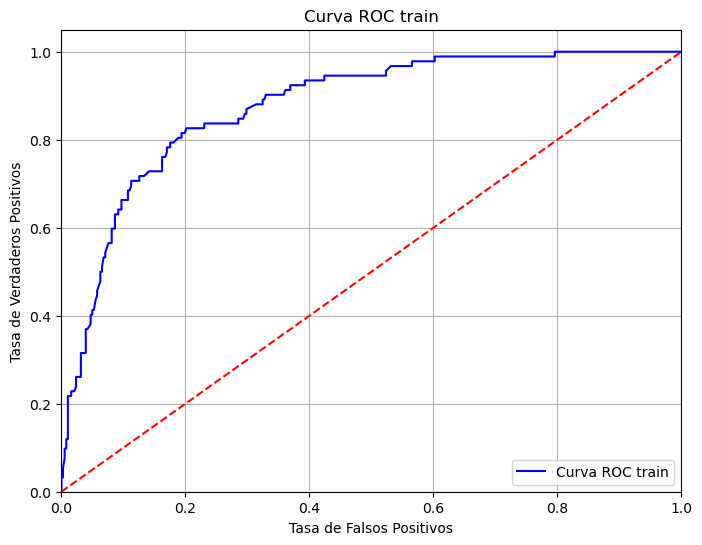

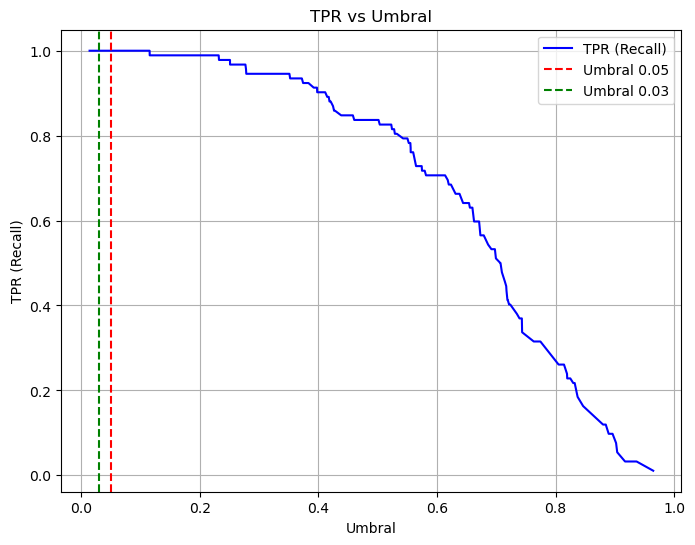

In [53]:
#show the roc curve for the model "modelo_hgb"
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_proba_train, pos_label=1)
#graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC train', color='blue')
plt.plot([0, 1], [0, 1], 'r--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC train')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# dibuja el fpr vs el umbral
plt.figure(figsize=(8, 6))
plt.plot(thresholds, tpr, label='TPR (Recall)', color='blue')
plt.xlabel('Umbral')
plt.ylabel('TPR (Recall)')
plt.title('TPR vs Umbral')
plt.axvline(x=0.05, color='red', linestyle='--', label='Umbral 0.05')
plt.axvline(x=0.03, color='green', linestyle='--', label='Umbral 0.03')
plt.legend()
plt.grid()
plt.show()



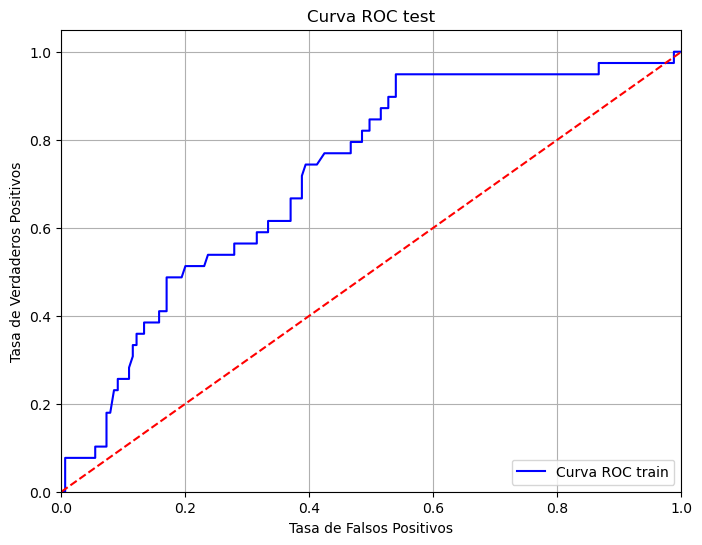

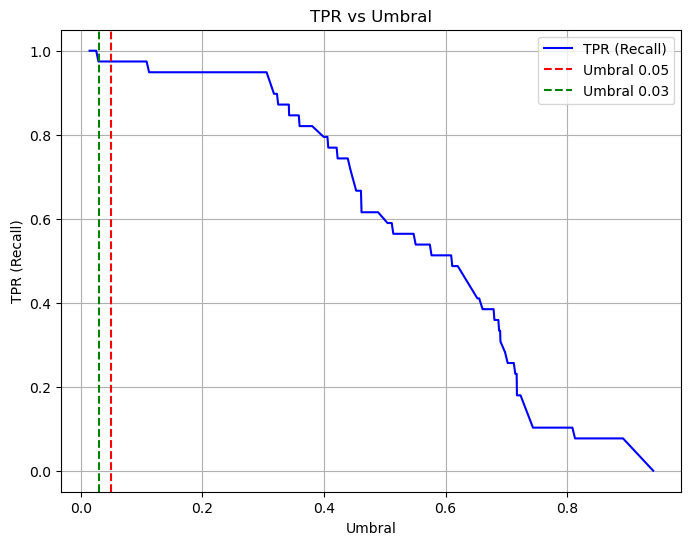

In [54]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba, pos_label=1)
#graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC train', color='blue')
plt.plot([0, 1], [0, 1], 'r--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC test')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# dibuja el fpr vs el umbral
plt.figure(figsize=(8, 6))
plt.plot(thresholds, tpr, label='TPR (Recall)', color='blue')
plt.xlabel('Umbral')
plt.ylabel('TPR (Recall)')
plt.title('TPR vs Umbral')
plt.axvline(x=0.05, color='red', linestyle='--', label='Umbral 0.05')
plt.axvline(x=0.03, color='green', linestyle='--', label='Umbral 0.03')
plt.legend()
plt.grid()
plt.show()



In [11]:
# Criterio: minimizar distancia al punto perfecto (0,1)
distancias = np.sqrt((1 - tpr)**2 + fpr**2)
umbral_optimo = thresholds[np.argmin(distancias)]
print(f"Umbral óptimo ROC: {umbral_optimo:.4f}")

f1_scores = [f1_score(y_train, y_proba_train > thr) for thr in thresholds]
umbral_f1 = thresholds[np.argmax(f1_scores)]
print(f"Umbral óptimo según F1-score: {umbral_f1:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_scores, label='F1-score', color='purple')
plt.axvline(x=umbral_f1, color='black', linestyle='--', label=f'Óptimo F1: {umbral_f1:.2f}')
plt.xlabel('Umbral')
plt.ylabel('F1-score')
plt.title('F1-score vs Umbral')
plt.legend()
plt.grid()
plt.show()


NameError: name 'tpr' is not defined

In [34]:
confusion_matrix(y_train, y_proba_train>0.1)

array([[ 66, 316],
       [  0,  92]])

In [30]:
confusion_matrix(y_test, y_proba>umbral_optimo)

array([[137,  28],
       [ 24,  15]])

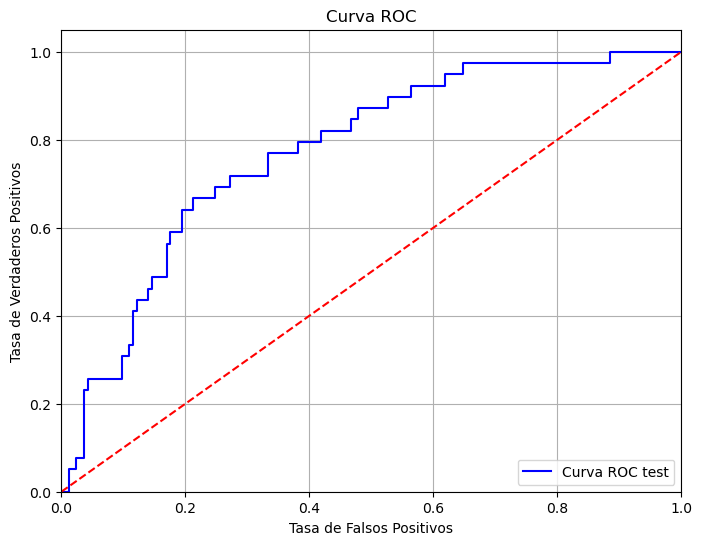

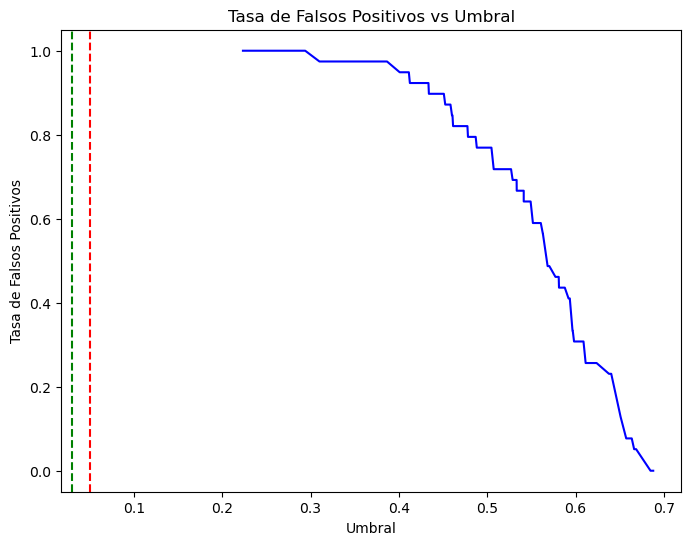

In [277]:
#show the roc curve for the model "modelo_hgb"
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba, pos_label=1)
#graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC test', color='blue')
plt.plot([0, 1], [0, 1], 'r--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# dibuja el fpr vs el umbral
plt.figure(figsize=(8, 6))
plt.plot(thresholds, tpr, label='Tasa de Falsos Positivos', color='blue')
plt.xlabel('Umbral')
plt.ylabel('Tasa de Falsos Positivos')
plt.title('Tasa de Falsos Positivos vs Umbral')
plt.axvline(x=0.05, color='red', linestyle='--', label='Umbral 0.05')
plt.axvline(x=0.03, color='green', linestyle='--', label='Umbral 0.03')
plt.show()


In [92]:
vars

['imc',
 'sat_oxig_diferencia_2',
 'tas_diferencia_2',
 'pcr_2',
 'tad_diferencia_0',
 'frec_card_0',
 'leucocitos_2',
 'il6_diferencia_0',
 'piloro',
 'perioperatorio_complete',
 'perdida_sang',
 'pcr_diferencia_2',
 'pcr_diferencia_0',
 'pcr_0',
 'neumopatia',
 'plaquetas_0',
 'neoadyuvancia',
 'nefropatia',
 'localizacion',
 'linfocitos_diferencia_2']

In [93]:
vars = vi.result['variable'].head(20).tolist()
# Filter out variables not present in df_modelos columns
vars = [var for var in vars if var in df_modelos.columns]
df_reduced = df_modelos[vars]


In [94]:
# Align indices of df_reduced with y to ensure they have the same number of rows
df_reduced = df_reduced.loc[y.index]

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(df_reduced, y, test_size=0.05, stratify=y)

In [95]:
modelo_reduced = HistGradientBoostingClassifier(
    max_iter=1000,           # Número de árboles (iteraciones)
    learning_rate=0.2,      # Tasa de aprendizaje
    max_depth=4,            # Profundidad máxima de los árboles
    early_stopping=True,    # Parada temprana si no mejora
    scoring='roc_auc'      # Métrica para early stopping
)

modelo_reduced.fit(X_train, y_train)

y_pred_train = modelo_reduced.predict(X_train)
y_proba_train = modelo_reduced.predict_proba(X_train)[:, 1] 

y_pred = modelo_reduced.predict(X_test)
y_proba = modelo_reduced.predict_proba(X_test)[:, 1] 

print("Matriz de confusión con train")
print(confusion_matrix(y_train, y_pred_train))
print("Reporte de clasificación:")
print(classification_report(y_train, y_pred_train))
print("Precisión:", accuracy_score(y_train, y_pred_train))
print("AUC:", roc_auc_score(y_train, y_proba_train))



print("\n\nMatriz de confusión con test")
print(confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))
print("Precisión:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_proba))

Matriz de confusión con train
[[126   1]
 [  5  16]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       127
           1       0.94      0.76      0.84        21

    accuracy                           0.96       148
   macro avg       0.95      0.88      0.91       148
weighted avg       0.96      0.96      0.96       148

Precisión: 0.9594594594594594
AUC: 0.9846269216347956


Matriz de confusión con test
[[7 0]
 [1 0]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.00      0.00      0.00         1

    accuracy                           0.88         8
   macro avg       0.44      0.50      0.47         8
weighted avg       0.77      0.88      0.82         8

Precisión: 0.875
AUC: 0.7142857142857143


/opt/miniconda3/envs/ads2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/miniconda3/envs/ads2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/miniconda3/envs/ads2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



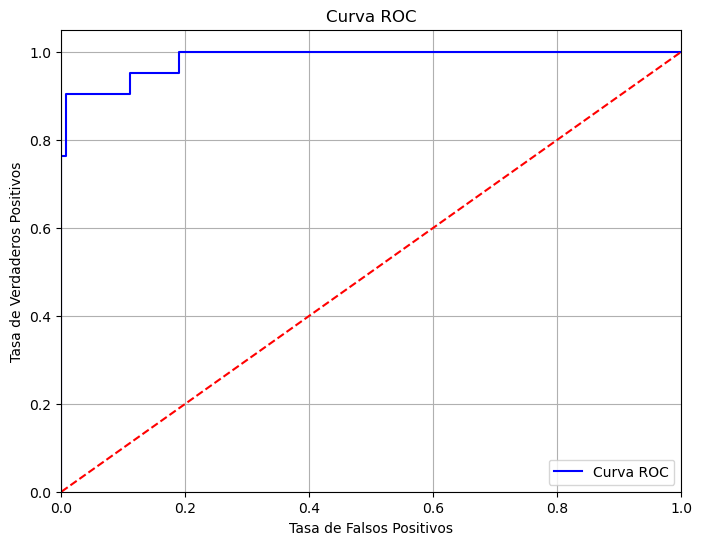

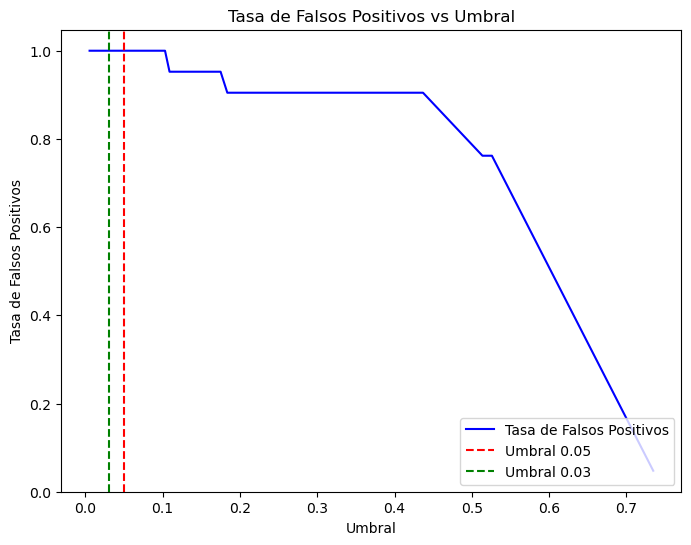

In [96]:
#show the roc curve for the model "modelo_hgb"
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_proba_train, pos_label=1)
#graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC', color='blue')
plt.plot([0, 1], [0, 1], 'r--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# dibuja el fpr vs el umbral
plt.figure(figsize=(8, 6))
plt.plot(thresholds, tpr, label='Tasa de Falsos Positivos', color='blue')
plt.xlabel('Umbral')
plt.ylabel('Tasa de Falsos Positivos')
plt.title('Tasa de Falsos Positivos vs Umbral')
plt.axvline(x=0.05, color='red', linestyle='--', label='Umbral 0.05')
plt.axvline(x=0.03, color='green', linestyle='--', label='Umbral 0.03')
plt.legend(loc='lower right')
plt.show()


In [23]:
confusion_matrix(y_train, y_proba_train>0.1)


array([[61, 66],
       [ 0, 21]])

In [61]:
confusion_matrix(y_test, y_proba>0.1)

array([[ 5, 22],
       [ 1,  6]])

In [26]:
# make a jitter plot with localizacion and linfocitos_3 coloring by fuga
plt.figure(figsize=(10, 6))
sns.stripplot(data=df_modelos, x='localizacion', y='il6_5', hue='fuga', palette='Set1', jitter=True, dodge=True)
plt.title('Scatter plot of localizacion vs linfocitos_5 colored by fuga')
plt.xlabel('localizacion')
plt.ylabel('linfocitos_3')
plt.legend(title='Fuga')
plt.grid()
plt.show()

ValueError: Could not interpret value `il6_5` for parameter `y`

<Figure size 1000x600 with 0 Axes>

In [ ]:
X_na = X.dropna()
X_na.shape

(208, 76)

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=5)
X_lle = lle.fit_transform(X_na)
# Align indices of y with X_na to ensure they have the same number of rows
y_lle = y.loc[X_na.index]

X_isomap_train, X_isomap_test, y_isomap_train, y_isomap_test = train_test_split(X_lle, y_lle, test_size=0.05, stratify=y_lle)

In [ ]:
# make a svm model for X_isomap
modelo_isomap = SVC(kernel='linear', probability=True)
modelo_isomap.fit(X_isomap_train, y_isomap_train)


SVC(kernel='linear', probability=True)

In [ ]:

y_pred_train_isomap = modelo_isomap.predict(X_isomap_train)
y_proba_train_isomap = modelo_isomap.predict_proba(X_isomap_train)[:, 1]

y_pred_test_isomap = modelo_isomap.predict(X_isomap_test)
y_proba_test_isomap = modelo_isomap.predict_proba(X_isomap_test)[:, 1]


In [ ]:
# print("Matriz de confusión con train")
print(confusion_matrix(y_isomap_train, y_pred_train_isomap))
print("Reporte de clasificación:")
print(classification_report(y_isomap_train, y_pred_train_isomap))
print("Precisión:", accuracy_score(y_isomap_train, y_pred_train_isomap))
print("AUC:", roc_auc_score(y_isomap_train, y_proba_train_isomap))
print("\n\nMatriz de confusión con test")
print(confusion_matrix(y_isomap_test, y_pred_test_isomap))
print("Reporte de clasificación:")
print(classification_report(y_isomap_test, y_pred_test_isomap))
print("Precisión:", accuracy_score(y_isomap_test, y_pred_test_isomap))
print("AUC:", roc_auc_score(y_isomap_test, y_proba_test_isomap))


[[138   0]
 [ 27   0]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       138
           1       0.00      0.00      0.00        27

    accuracy                           0.84       165
   macro avg       0.42      0.50      0.46       165
weighted avg       0.70      0.84      0.76       165

Precisión: 0.8363636363636363
AUC: 0.4847020933977456


Matriz de confusión con test
[[7 0]
 [2 0]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       0.00      0.00      0.00         2

    accuracy                           0.78         9
   macro avg       0.39      0.50      0.44         9
weighted avg       0.60      0.78      0.68         9

Precisión: 0.7777777777777778
AUC: 0.7142857142857143


/opt/miniconda3/envs/ads2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/miniconda3/envs/ads2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/miniconda3/envs/ads2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/miniconda3/envs/ads2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_div

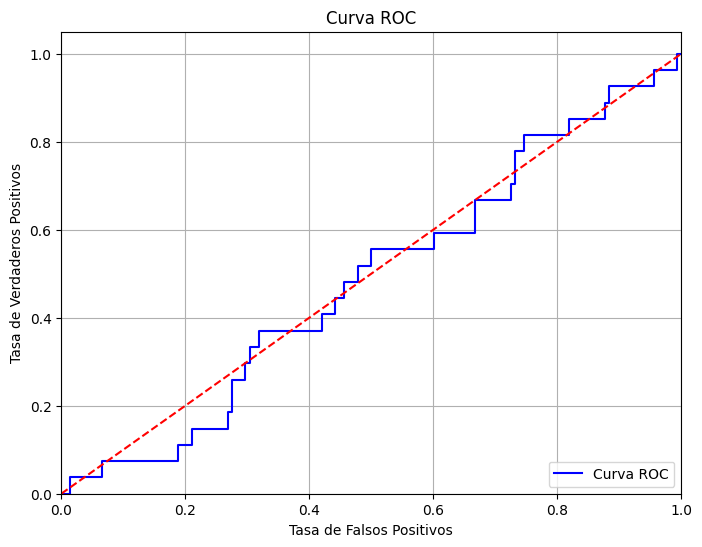

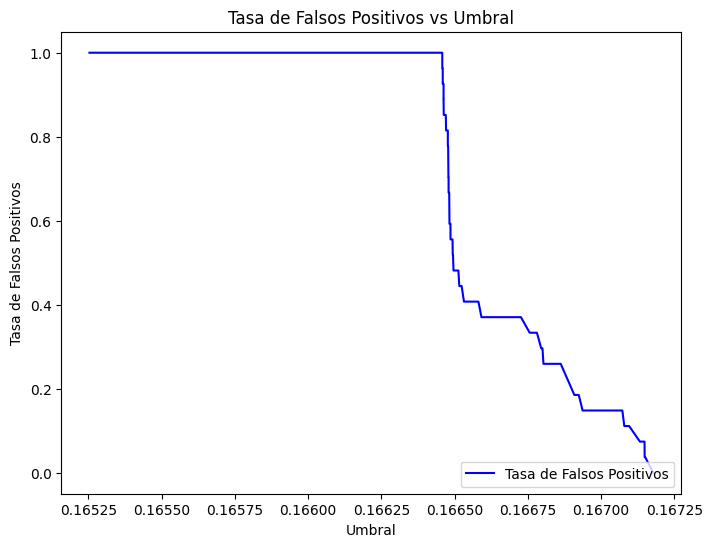

In [ ]:
#show the roc curve for the model "modelo_isomap"
fpr, tpr, thresholds = metrics.roc_curve(y_isomap_train, y_proba_train_isomap, pos_label=1)
#graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC', color='blue')
plt.plot([0, 1], [0, 1], 'r--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# dibuja el fpr vs el umbral
plt.figure(figsize=(8, 6))
plt.plot(thresholds, tpr, label='Tasa de Falsos Positivos', color='blue')
plt.xlabel('Umbral')
plt.ylabel('Tasa de Falsos Positivos')
plt.title('Tasa de Falsos Positivos vs Umbral')
plt.legend(loc='lower right')
plt.show()


In [ ]:
confusion_matrix(y_isomap_train, y_proba_train_isomap>0.15)


array([[  0, 138],
       [  0,  27]])